## import the libarary

In [1]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git


  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\lamaa\appdata\local\temp\pip-req-build-tg4z7dqw
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit d60ce38b6a2d8aa55f29502f5517d47c1d9e4a5c
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\lamaa\AppData\Local\Temp\pip-req-build-tg4z7dqw'


In [73]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import re
from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE
from openpyxl import *

## uplouds the tweets of the event #GameAwards :)

In [21]:
attributes_container = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(
    'game awards (loss OR win) (#GameAwards) lang:en until:2022-12-10 since:2022-12-08').get_items()):
    if i>100000:
        break
    attributes_container.append([tweet.user.username,tweet.user.displayname , tweet.date, 
                                 tweet.likeCount, tweet.sourceLabel, tweet.content, 
                                 tweet.lang,tweet.coordinates, tweet.place])
     
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Name", "Date Created", 
                                                        "Number of Likes", "Source of Tweet", "Tweet", 
                                                        "Language", "Coordinates","place"])

tweets_df["cleanTweet"] = tweets_df["Tweet"].apply(lambda s: re.sub(r'(?:\@\w+)','', s))# remove string like: @kmkk 
tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(  r'([$@&!~#^*+=-_]+)'    ,'', s)) 
tweets_df = tweets_df[tweets_df['Language'] ==  "en"]
tweets_df['Date Created'] = tweets_df['Date Created'].apply(lambda a: pd.to_datetime(a).date())
print(tweets_df)
tweets_df.to_excel('TwitterDataGameawards.xlsx')

                User                          Name Date Created  \
0       SarmadWasama                         MSARW   2022-12-09   
1           IamBreze                      IamBreze   2022-12-09   
2    MrSprinkles1138  Nathan “Fresh Stink” Shapiro   2022-12-09   
3     1VideoGameDude             1 Video Game Dude   2022-12-09   
4         MQuincifer            Mynameis Quincifer   2022-12-09   
..               ...                           ...          ...   
894      Valor_Ghost                    Valorghost   2022-12-08   
895  EarthboundIan99           Ian | Earthboundian   2022-12-08   
896    TheSolarWolf1       🌨️The Solar Snow Wolf🌨️   2022-12-08   
897   MorganItIsThen                MorganItIsThen   2022-12-08   
898         Curtis_4                 Curtis Hilmes   2022-12-08   

     Number of Likes      Source of Tweet  \
0                  1  Twitter for Android   
1                 10   Twitter for iPhone   
2                  2   Twitter for iPhone   
3              

# EDA time

In [22]:
df = pd.read_excel('TwitterDataGameawards.xlsx')

In [23]:
df

,Unnamed: 0,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,Coordinates,place,cleanTweet
0,0,SarmadWasama,MSARW,2022-12-09,1,Twitter for Android,I can't believe #HorizonForbiddenWest didn't w...,en,NaN,NaN,can't believe orizonorbiddenest didn't win a ...
1,1,IamBreze,IamBreze,2022-12-09,10,Twitter for iPhone,Seeing #MultiVersus win Best Fighting Game 202...,en,NaN,NaN,eeing ultiersus win est ighting ame 2022 made ...
2,2,MrSprinkles1138,Nathan “Fresh Stink” Shapiro,2022-12-09,2,Twitter for iPhone,I was sitting in the front row for the whole B...,en,NaN,NaN,was sitting in the front row for the whole il...
3,3,1VideoGameDude,1 Video Game Dude,2022-12-09,4,Twitter for Android,What did everyone think about the #gameawards ...,en,NaN,NaN,hat did everyone think about the gameawards i...
4,4,MQuincifer,Mynameis Quincifer,2022-12-09,0,Twitter Web App,Fuck #GodofWarRagnarok. It was a truly deserve...,en,NaN,NaN,uck odofaragnarok. t was a truly deserved loss...
...,...,...,...,...,...,...,...,...,...,...,...
894,894,Valor_Ghost,Valorghost,2022-12-08,1,Twitter Web App,#gameawards Oh boy. I can't wait to see what p...,en,NaN,NaN,gameawards h boy. can't wait to see what paid...
895,895,EarthboundIan99,Ian | Earthboundian,2022-12-08,1,Twitter Web App,I think I speak for most people when I say tha...,en,NaN,NaN,think speak for most people when say that e...
896,896,TheSolarWolf1,🌨️The Solar Snow Wolf🌨️,2022-12-08,4,Twitter Web App,#SonicFrontiers #gameawards \n\nI better see S...,en,NaN,NaN,"onicrontiers gameawards \n\n better see onic, ..."
897,897,MorganItIsThen,MorganItIsThen,2022-12-08,1,Twitter for Android,Gonna be streaming the game awards tomorrow wi...,en,NaN,NaN,onna be streaming the game awards tomorrow wit...


In [24]:
df.drop(columns=['Coordinates','place'],inplace = True)
df

,Unnamed: 0,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,cleanTweet
0,0,SarmadWasama,MSARW,2022-12-09,1,Twitter for Android,I can't believe #HorizonForbiddenWest didn't w...,en,can't believe orizonorbiddenest didn't win a ...
1,1,IamBreze,IamBreze,2022-12-09,10,Twitter for iPhone,Seeing #MultiVersus win Best Fighting Game 202...,en,eeing ultiersus win est ighting ame 2022 made ...
2,2,MrSprinkles1138,Nathan “Fresh Stink” Shapiro,2022-12-09,2,Twitter for iPhone,I was sitting in the front row for the whole B...,en,was sitting in the front row for the whole il...
3,3,1VideoGameDude,1 Video Game Dude,2022-12-09,4,Twitter for Android,What did everyone think about the #gameawards ...,en,hat did everyone think about the gameawards i...
4,4,MQuincifer,Mynameis Quincifer,2022-12-09,0,Twitter Web App,Fuck #GodofWarRagnarok. It was a truly deserve...,en,uck odofaragnarok. t was a truly deserved loss...
...,...,...,...,...,...,...,...,...,...
894,894,Valor_Ghost,Valorghost,2022-12-08,1,Twitter Web App,#gameawards Oh boy. I can't wait to see what p...,en,gameawards h boy. can't wait to see what paid...
895,895,EarthboundIan99,Ian | Earthboundian,2022-12-08,1,Twitter Web App,I think I speak for most people when I say tha...,en,think speak for most people when say that e...
896,896,TheSolarWolf1,🌨️The Solar Snow Wolf🌨️,2022-12-08,4,Twitter Web App,#SonicFrontiers #gameawards \n\nI better see S...,en,"onicrontiers gameawards \n\n better see onic, ..."
897,897,MorganItIsThen,MorganItIsThen,2022-12-08,1,Twitter for Android,Gonna be streaming the game awards tomorrow wi...,en,onna be streaming the game awards tomorrow wit...


In [42]:
df['Tweet'] = df['Tweet'].astype(str).str.lower()
df.head(3)

,Unnamed: 0,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,cleanTweet
0,0,SarmadWasama,MSARW,2022-12-09,1,Twitter for Android,i can't believe #horizonforbiddenwest didn't w...,en,can't believe orizonorbiddenest didn't win a ...
1,1,IamBreze,IamBreze,2022-12-09,10,Twitter for iPhone,seeing #multiversus win best fighting game 202...,en,eeing ultiersus win est ighting ame 2022 made ...
2,2,MrSprinkles1138,Nathan “Fresh Stink” Shapiro,2022-12-09,2,Twitter for iPhone,i was sitting in the front row for the whole b...,en,was sitting in the front row for the whole il...


In [43]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['Tweet_token']=df['Tweet'].apply(regexp.tokenize)
df.head(3)

,Unnamed: 0,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,cleanTweet,Tweet_token
0,0,SarmadWasama,MSARW,2022-12-09,1,Twitter for Android,i can't believe #horizonforbiddenwest didn't w...,en,can't believe orizonorbiddenest didn't win a ...,"[i, can, t, believe, horizonforbiddenwest, did..."
1,1,IamBreze,IamBreze,2022-12-09,10,Twitter for iPhone,seeing #multiversus win best fighting game 202...,en,eeing ultiersus win est ighting ame 2022 made ...,"[seeing, multiversus, win, best, fighting, gam..."
2,2,MrSprinkles1138,Nathan “Fresh Stink” Shapiro,2022-12-09,2,Twitter for iPhone,i was sitting in the front row for the whole b...,en,was sitting in the front row for the whole il...,"[i, was, sitting, in, the, front, row, for, th..."


In [44]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lamaa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [46]:
df['Tweet_token'] = df['Tweet_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Unnamed: 0,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,cleanTweet,Tweet_token
0,0,SarmadWasama,MSARW,2022-12-09,1,Twitter for Android,i can't believe #horizonforbiddenwest didn't w...,en,can't believe orizonorbiddenest didn't win a ...,"[believe, horizonforbiddenwest, win, single, r..."
1,1,IamBreze,IamBreze,2022-12-09,10,Twitter for iPhone,seeing #multiversus win best fighting game 202...,en,eeing ultiersus win est ighting ame 2022 made ...,"[seeing, multiversus, win, best, fighting, gam..."
2,2,MrSprinkles1138,Nathan “Fresh Stink” Shapiro,2022-12-09,2,Twitter for iPhone,i was sitting in the front row for the whole b...,en,was sitting in the front row for the whole il...,"[sitting, front, row, whole, bill, clinton, ga..."


In [48]:
df['Tweet_string'] = df['Tweet_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['Tweet', 'Tweet_token', 'Tweet_string']].head()

,Tweet,Tweet_token,Tweet_string
0,i can't believe #horizonforbiddenwest didn't w...,"[believe, horizonforbiddenwest, win, single, r...",believe horizonforbiddenwest win single reward...
1,seeing #multiversus win best fighting game 202...,"[seeing, multiversus, win, best, fighting, gam...",seeing multiversus win best fighting game 2022...
2,i was sitting in the front row for the whole b...,"[sitting, front, row, whole, bill, clinton, ga...",sitting front row whole bill clinton game awar...
3,what did everyone think about the #gameawards ...,"[everyone, think, gameawards, right, game, win...",everyone think gameawards right game win elden...
4,fuck #godofwarragnarok. it was a truly deserve...,"[fuck, godofwarragnarok, truly, deserved, loss...",fuck godofwarragnarok truly deserved loss game...


In [50]:
all_words = ' '.join([word for word in df['Tweet_string']])

In [52]:
import nltk
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lamaa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [53]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'win': 940, 'gameawards': 901, 'game': 336, 'elden': 202, 'ring': 199, 'year': 167, 'god': 124, 'goty': 119, 'war': 117, 'best': 113, ...})

In [55]:
df['Tweet_string_fdist'] = df['Tweet_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df[['Tweet', 'Tweet_token', 'Tweet_string', 'Tweet_string_fdist']].head()

,Tweet,Tweet_token,Tweet_string,Tweet_string_fdist
0,i can't believe #horizonforbiddenwest didn't w...,"[believe, horizonforbiddenwest, win, single, r...",believe horizonforbiddenwest win single reward...,believe horizonforbiddenwest win single reward...
1,seeing #multiversus win best fighting game 202...,"[seeing, multiversus, win, best, fighting, gam...",seeing multiversus win best fighting game 2022...,seeing multiversus win best fighting game 2022...
2,i was sitting in the front row for the whole b...,"[sitting, front, row, whole, bill, clinton, ga...",sitting front row whole bill clinton game awar...,sitting front row whole bill clinton game awar...
3,what did everyone think about the #gameawards ...,"[everyone, think, gameawards, right, game, win...",everyone think gameawards right game win elden...,everyone think gameawards right game win elden...
4,fuck #godofwarragnarok. it was a truly deserve...,"[fuck, godofwarragnarok, truly, deserved, loss...",fuck godofwarragnarok truly deserved loss game...,fuck godofwarragnarok truly deserved loss game...


In [56]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lamaa\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lamaa\AppData\Roaming\nltk_data...


True

In [58]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
df['Tweet_string_lem'] = df['Tweet_string_fdist'].apply(wordnet_lem.lemmatize)

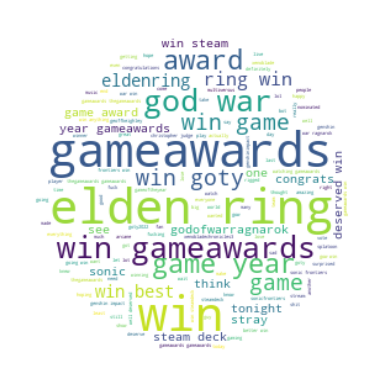

In [95]:
all_words_lem = ' '.join([word for word in df['Tweet_string_lem']])
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

In [61]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [92]:
print(fd["godofwarragnarok"])
print(fd["splatoon"])
print(fd["stray"])
print(fd["sonic"])
print(fd["elden"])

70
12
42
82
202


In [101]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','purple']
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['God of war ragnarok','Splatoon 3','Stray','Sonic Frontiers','Elden rings'],
                             values=[70, 12,42,82,202])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Top 5 Name games were most frequent in #GameAwards ")
fig.show()

In [26]:
df['Source of Tweet'].value_counts().head(10)

Twitter for iPhone     331
Twitter for Android    298
Twitter Web App        246
Twitter for iPad        12
TweetDeck                6
Buffer                   2
Tweetbot for iΟS         1
Twitter for Mac          1
Tweetbot for Mac         1
Streamlabs Twitter       1
Name: Source of Tweet, dtype: int64

In [87]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=['Twitter for iPhone ','Twitter for Android','Twitter Web App','Twitter for iPad','TweetDeck'],
                             values=[331, 298,246,12,6])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Top 5 Source of Tweet were most active in #GameAwards ")
fig.show()

In [25]:
df['User'].value_counts().head(10)

SportsmuseZ        11
GalaxySlay25        6
PasswordSuck2       5
joe_fayant          4
DoggtorEd           4
gamergalmilla       3
npcsav_             3
thegeekspeakpod     3
bigmanowen2         3
FrostlichTheDK      2
Name: User, dtype: int64

In [76]:
labels = ['SportsmuseZ ','GalaxySlay25','PasswordSuck2','joe_fayant','DoggtorEd']
values = [11, 6, 5, 4,4]
data = {'labels':labels, 'values':values}
dummy_df = pd.DataFrame(data)

In [78]:
import plotly.express as px
fig = px.pie(dummy_df, values='values', names='labels', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Top 5 accounts were most active in #GameAwards ")
fig.show()